## Uebung 04 - Lineare Elastizität

Man stellt bei Materialien oft fest, dass sich das Verhalten von der volumetrischen und deviatorischen Spannungs-Dehnungsrelation oft unterscheidet. Deshalb modelliert man die freie Energiefunktion oftmals in Abhängigkeit der Spur des Dehnungstensors $\textrm{tr } \mathbf{\varepsilon}$ und der Norm des deviatorischen Anteils des Dehnungstensors $\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert$. Die Spur von $\mathbf{\varepsilon}$ stellt dabei eine passende Metrik für die Volumendehnung dar, während der deviatorische Anteil die Volumen erhaltende Anteile der Dehnung abbildet.

Also erhält man generell freie Energiefunktionen der Form

\begin{equation}
\psi = \hat\psi(\textrm{tr } \mathbf{\varepsilon},\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert) .
\end{equation}

Die Aufteilung des Dehnungstensors in volumetrische und deviatorische Anteile ist gegeben durch 

\begin{equation*}
\mathbf{\varepsilon} = \frac{1}{3} \textrm{tr } \mathbf{\varepsilon} \mathbf{1} + \tilde{\mathbf{\varepsilon}} .
\end{equation*}

Ein häufig auftretender Tensor ist in diesem Kontext der Projektionstensor 4. Stufe

\begin{equation*}
\mathbb P = \mathbb{I} -\frac{1}{3} \mathbf{1} \otimes \mathbf{1} ,
\end{equation*}

er dient bei der Multiplikation mit einem Tensor als Abbildung, die den Tensor auf ihren jeweiligen deviatorischen Anteil abbildet
$\tilde{\mathbf{\varepsilon}} = \mathbf{\varepsilon}:\mathbb P$.

$\mathbb{I}$ ist hier der Einheitstensor 4. Stufe.

In [1]:
using Tensors
using Plots

Tensoren sind in Julia in ihrer Ordnung und Dimension parametrisiert. Das heißt, dass je nach Ordnung und Dimension des Problems, der passende Tensor erzeugt wird.

In [2]:
SymmetricTensor{2,3}(1:6)

3×3 SymmetricTensor{2,3,Int64,6}:
 1  2  3
 2  4  5
 3  5  6

In [3]:
tovoigt(SymmetricTensor{2,3}(1:6))

6-element Array{Int64,1}:
 1
 4
 6
 5
 3
 2

In [4]:
dim = 3
𝕀 = one(SymmetricTensor{4, dim})
𝐈 = one(SymmetricTensor{2,dim})

3×3 SymmetricTensor{2,3,Float64,6}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [5]:
tovoigt(𝐈 ⊗ 𝐈)

6×6 Array{Float64,2}:
 1.0  1.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [6]:
ℙ = 𝕀 - 1/3*(𝐈 ⊗ 𝐈)
ℙ_voigt =  tovoigt(ℙ)

6×6 Array{Float64,2}:
  0.666667  -0.333333  -0.333333  0.0  0.0  0.0
 -0.333333   0.666667  -0.333333  0.0  0.0  0.0
 -0.333333  -0.333333   0.666667  0.0  0.0  0.0
  0.0        0.0        0.0       0.5  0.0  0.0
  0.0        0.0        0.0       0.0  0.5  0.0
  0.0        0.0        0.0       0.0  0.0  0.5

In [7]:
𝕀_voigt = tovoigt(𝕀)

6×6 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.5  0.0  0.0
 0.0  0.0  0.0  0.0  0.5  0.0
 0.0  0.0  0.0  0.0  0.0  0.5

4. Stufe Tensoren wie z.B. der Einheitstensor 4. Stufe
\begin{equation*}
\mathbb I = 
\begin{array}{cc}
{\small
\begin{array}{ccccccccc}
11 & 22 & 33 & 12 & 23 & 13 & 21 & 32 & 31 
\end{array}
} &
\\
\left[
\renewcommand{\arraystretch}{1.1}
\begin{array}{ccc|ccc|ccc}
\,1\,&\,0\,&\,0\,&\,0\,&\,0\,&\,0\,&\,0\,&\,0\,&0\,\\
0&1&0&0&0&0&0&0&0\\
0&0&1&0&0&0&0&0&0\\ \hline
0&0&0&1&0&0&0&0&0\\
0&0&0&0&1&0&0&0&0\\
0&0&0&0&0&1&0&0&0\\ \hline
0&0&0&0&0&0&1&0&0\\
0&0&0&0&0&0&0&1&0\\
0&0&0&0&0&0&0&0&1
\end{array}
\right] &
{\small
\renewcommand{\arraystretch}{1.33}
\begin{array}{c}
11 \\
22 \\
33 \\
12 \\
23 \\
13 \\
21 \\
32 \\
31
\end{array}
}
\end{array} \, , 
\end{equation*}

werden zu 6x6-Matrizen reduziert durch

i) Beachtung der Symmetrie des Dehnungstensors (aufsummieren der letzten beiden Spalten und durch 2 teilen):
\begin{equation*}
\Rightarrow 
\left[
\renewcommand{\arraystretch}{1.1}
\begin{array}{ccc|ccc}
1&0&0&0&0&0\\
0&1&0&0&0&0\\
0&0&1&0&0&0\\ \hline
0&0&0&\frac{1}{2}&0&0\\
0&0&0&0&\frac{1}{2}&0\\
0&0&0&0&0&\frac{1}{2}\\ \hline
0&0&0&\frac{1}{2}&0&0\\
0&0&0&0&\frac{1}{2}&0\\
0&0&0&0&0&\frac{1}{2}
\end{array}
\right]
\end{equation*}

und ii) Beachtung der Symmetrie des Spannungstensors (aufsummieren der letzten beiden Spalten und durch 2 teilen):
\begin{equation*}
\Rightarrow 
\left[
\renewcommand{\arraystretch}{1.1}
\begin{array}{ccc|ccc}
1&0&0&0&0&0\\
0&1&0&0&0&0\\
0&0&1&0&0&0\\ \hline
0&0&0&\frac{1}{2}&0&0\\
0&0&0&0&\frac{1}{2}&0\\
0&0&0&0&0&\frac{1}{2}
\end{array}
\right] = \bar{\mathbb I} \, .
\end{equation*}

### Aufgabe 4.1a

Bilden Sie mithilfe der Kettenregel die allgemeine Ableitungsregel für die definierte freie Energiefunktion $\hat\psi$, so dass Sie $\sigma$ erhalten

\begin{equation*}
\sigma = \dfrac{\partial\psi}{\partial\mathbf{\varepsilon}} 
= \ ? 
\end{equation*}

### Aufgabe 4.1b

Expandieren bzw. lösen sie alle $\hat\psi$ unabhängigen Terme auf


## Aufgabe 4.2

Gegeben ist die freie Energiefunktion
\begin{equation*}
\psi = \frac{1}{2} \kappa \,(\mathrm{tr} \;\mathbf{\varepsilon})^2 + \mu\,\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert^2  \, .
\label{eq:psi 1}
\end{equation*}

### Aufgabe 4.2a

Geben Sie die Spannung $\sigma$ in Abhängigkeit des Dehnungstensors $\mathbf{\varepsilon}$ und Materialparameter $\kappa$ und $\mu$ an

\begin{equation*}
\renewcommand{\arraystretch}{1.8}
\begin{array}{rl}
\sigma &= \dfrac{\partial \psi}{\partial \mathbf{\varepsilon}}=\dfrac{\partial\psi}{\partial\mathrm{tr} \;\mathbf{\varepsilon}}\;\dfrac{\partial\mathrm{tr} \;\mathbf{\varepsilon}}
{\partial\mathbf{\varepsilon}}
           + \dfrac{\partial\psi}{\partial\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert}
           \;\dfrac{\partial\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert}{\partial\tilde{\mathbf{\varepsilon}}}
           :\dfrac{\partial\tilde{\mathbf{\varepsilon}}}{\partial\mathbf{\varepsilon}} \\
        &= 
\end{array} \, .
\end{equation*}

### Aufgabe 4.2b

Leiten Sie Tangentenmoduli $\mathbb{C}$ her

\begin{equation*}
\renewcommand{\arraystretch}{1.8}
\begin{array}{rl}
\mathbb{C} &= \dfrac{\partial^2\psi}{\partial\mathbf{\varepsilon}\,\partial\mathbf{\varepsilon}} = \dfrac{\sigma}{\partial\mathbf{\varepsilon}} = \dfrac{\partial\sigma}{\partial\mathrm{tr} \;\mathbf{\varepsilon}}\otimes\dfrac{\partial\mathrm{tr} \;\mathbf{\varepsilon}}
{\partial\mathbf{\varepsilon}}
       + \dfrac{\partial\sigma}{\partial\tilde{\mathbf{\varepsilon}}}:\dfrac{\partial\tilde{\mathbf{\varepsilon}}}
{\partial\mathbf{\varepsilon}} \\
    &= 
\end{array} \, .
\end{equation*}

In [8]:
E = 210000 # E Modul von Stahl in MPa
ν = 0.3 # Poissonzahl Stahl
κ = E/(3*(1-2*ν)) # Kompressionsmodul MPa
μ = E / (2*(1 + ν)) # Schubmodul in MPa

ℂ = SymmetricTensor{4, 3}(κ*𝐈⊗𝐈 + 2*μ*ℙ)
tovoigt(ℂ)

6×6 Array{Float64,2}:
 282692.0  121154.0  121154.0      0.0      0.0      0.0
 121154.0  282692.0  121154.0      0.0      0.0      0.0
 121154.0  121154.0  282692.0      0.0      0.0      0.0
      0.0       0.0       0.0  80769.2      0.0      0.0
      0.0       0.0       0.0      0.0  80769.2      0.0
      0.0       0.0       0.0      0.0      0.0  80769.2

In [9]:
function constant(max::Float64, t::Array, ν::Float64)
    load = [fromvoigt(SymmetricTensor{2,3},[max, -ν*max, -ν*max, 0, 0, 0]) for step in t]
    return load
end

function constant_cycle(t::Int, t_end::Int)
    if (t > t_end÷4+1 && t < t_end÷2) || (t > t_end*3÷4+1 && t < t_end)
        return 0
    else
        return 1
    end
end
    
function constant_cycle(max::Float64, t::Array, ν::Float64)
    T = t[end]
    δ(i,j) = i == j ? 1.0 : 0.0
    load = [SymmetricTensor{2,3}((i,j) -> if i==1 max*δ(i,j)*constant_cycle(step,T) else -ν*max*δ(i,j)*constant_cycle(step,T) end) for step in t]
    return load
end

function linear(max::Float64, t::Array, ν::Float64)
    T = t[end]
    δ(i,j) = i == j ? 1.0 : 0.0
    load = [SymmetricTensor{2,3}((i,j) -> if i==1 max*δ(i,j)*linear(step,T) else -ν*max*δ(i,j)*linear(step,T) end) for step in t]
    return load
end

function linear3Directions(max::Float64, t::Array, ν::Float64)
    T = t[end]
    δ(i,j) = i == j ? 1.0 : 0.0
    load = [SymmetricTensor{2,3}((i,j) -> max*δ(i,j)*linear(step,T)) for step in t]
    return load
end

function linear(t::Int, t_end::Int)
    return (t/t_end)
end

linear (generic function with 2 methods)

In [10]:
t = collect(1:1:100);
linear(0.1,t,ν)[1]

3×3 SymmetricTensor{2,3,Float64,6}:
  0.001  -0.0     -0.0
 -0.0    -0.0003  -0.0
 -0.0    -0.0     -0.0003

In [11]:
σ_linear = SymmetricTensor{2,3}[]
ε_linear = linear(0.1,t,ν)

for timestep in t
    push!(σ_linear, ? )
end

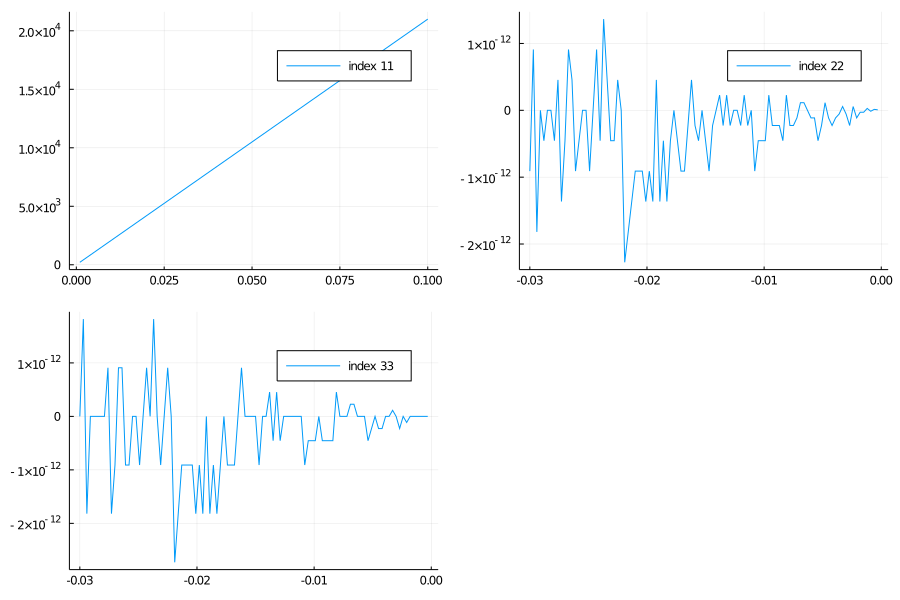

In [12]:
sigma11 = plot(getindex.(ε_linear,1,1),getindex.(σ_linear, 1,1),label="index 11")
sigma22 = plot(getindex.(ε_linear,2,2),getindex.(σ_linear, 2,2),label="index 22")
sigma33 = plot(getindex.(ε_linear,3,3),getindex.(σ_linear, 3,3),label="index 33")
plot(sigma11,sigma22,sigma33,layout=3, size=(900,600))

In [13]:
σ_linear_3Dir = SymmetricTensor{2,3}[]
ε_linear_3Dir = linear3Directions(0.1,t,ν)

for timestep in t
    push!(σ_linear_3Dir, ? )
end

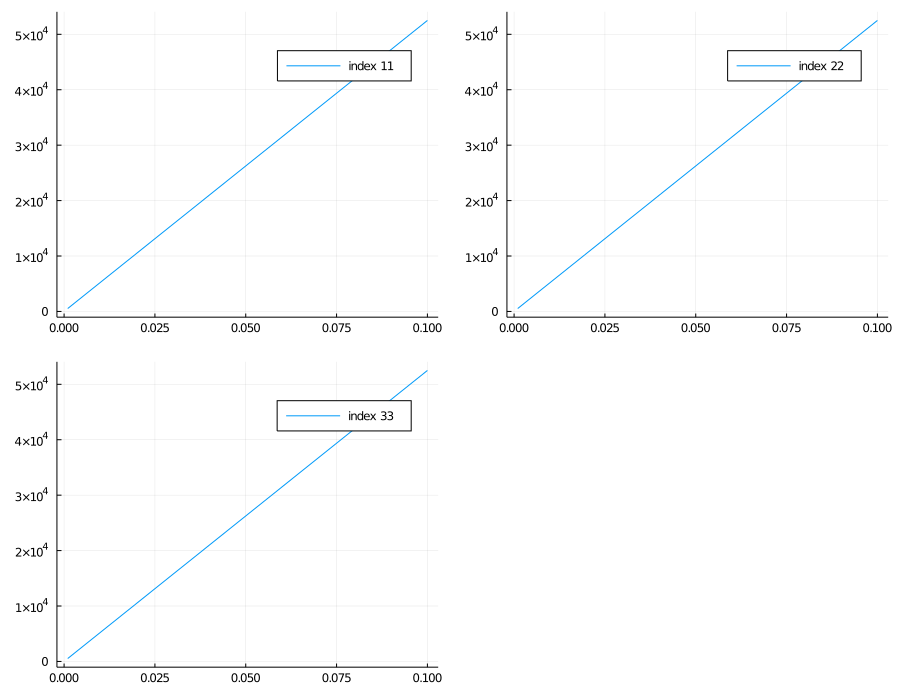

In [14]:
sigma11 = plot(getindex.(ε_linear_3Dir,1,1),getindex.(σ_linear_3Dir, 1,1),label="index 11")
sigma22 = plot(getindex.(ε_linear_3Dir,2,2),getindex.(σ_linear_3Dir, 2,2),label="index 22")
sigma33 = plot(getindex.(ε_linear_3Dir,3,3),getindex.(σ_linear_3Dir, 3,3),label="index 33")
plot(sigma11,sigma22,sigma33,layout=3, size=(900,700))

## Aufgabe 4.3

Gegeben ist die freie Energiefunktion
\begin{equation*}
\psi = \kappa\,\left[\,\frac{1}{2}\,(\mathrm{tr} \; \mathbf{\varepsilon})^2 + k_1\,\frac{1}{3}\,
(\mathrm{tr} \; \mathbf{\varepsilon})^3\right] 
      +2\,\mu\,\left[\,\frac{1}{2}\,\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert^2 + k_2\,\frac{1}{4}\vert\vert \tilde{\mathbf{\varepsilon}} \vert\vert^4\right]
\, 
\end{equation*}
mit $k_1, k_2\;\in\;[0,1]$. Wenn $k_1, k_2 = 0$ dann bekommen wir lineares Materialverhalten, siehe Aufgabe 1. 


## Aufgabe 4.3a
Geben Sie die Spannung $\sigma$ in Abhängigkeit des Dehnungstensors $\mathbf{\varepsilon}$ und Materialparameter $\kappa$ und $\mu$ an

\begin{equation*}
\mathbf{\sigma} = 
\end{equation*}

### Aufgabe 4.3b

Leiten Sie Tangentenmoduli $\mathbb{C}$ her


In [15]:
E = 210000 # E Modul von Stahl in MPa
ν = 0.3 # Poissonzahl Stahl
κ = E/(3*(1-2*ν)) # Kompressionsmodul MPa
μ = E / (2*(1 + ν)) # Schubmodul in MPa
k₁ = 1.0
k₂ = 1.0
σ_nonlinear = SymmetricTensor{2,3}[]
ε_nonlinear = linear3Directions(0.4,t,ν)  

for timestep in t
    trε = tr(ε_nonlinear[timestep])
    devε = dev(ε_nonlinear[timestep])
    push!(σ_nonlinear, ? )
end

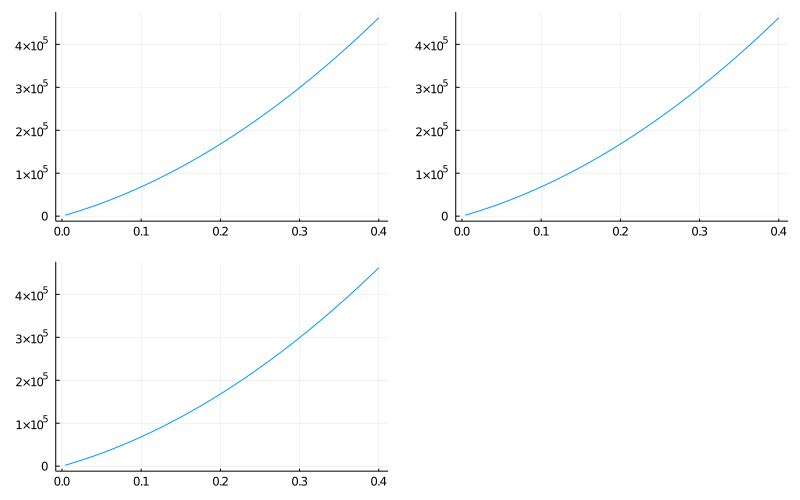

In [16]:
sigma11 = plot(getindex.(ε_nonlinear,1,1),getindex.(σ_nonlinear, 1,1), label="index 11")
sigma22 = plot(getindex.(ε_nonlinear,2,2),getindex.(σ_nonlinear, 2,2), label="index 22")
sigma33 = plot(getindex.(ε_nonlinear,3,3),getindex.(σ_nonlinear, 3,3), label="index 33")
plot(sigma11,sigma22,sigma33,layout=3,legend=false, size=(800,500))